In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Obtener cantidad de filas  y columnas, los nombres de las columnas y tipo de datos 

In [45]:
data.shape

(150, 6)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##### Examine los nombres de las especies y observe que todas comienzan con 'Iris-'. Elimine esta parte del nombre para que el nombre de la especie sea más corto.

In [47]:
data['Species'] = data.Species.str.replace('Iris-', '')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


##### Elimine la columna ID 

In [48]:
data.drop(columns = ['Id'], axis = 1, inplace = True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### Determina lo siguiente:

* El número de flor por cada especie.
* La media, mediana, cuantiles y rangos (máx.-mín.) para cada medición de pétalos y sépalos.


In [49]:
data.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [50]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


##### Haga un diagrama de dispersión de sepal_length vs sepal_width usando Matplotlib. 

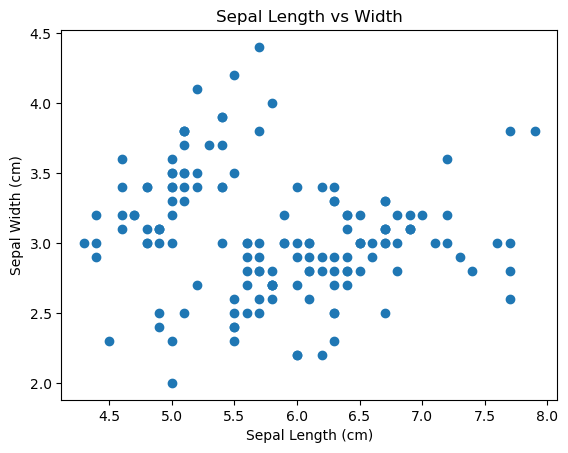

In [51]:
ax = plt.axes()

ax.scatter(data.SepalLengthCm, data.SepalWidthCm)

ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

##### Grafique un histograma de cada variable

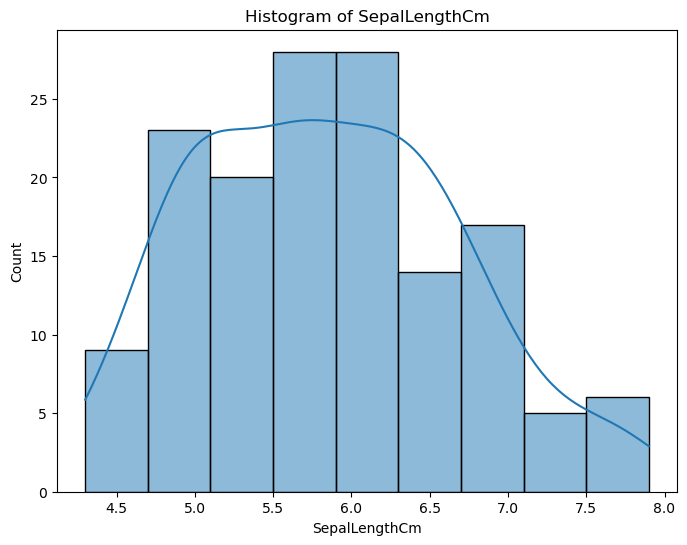

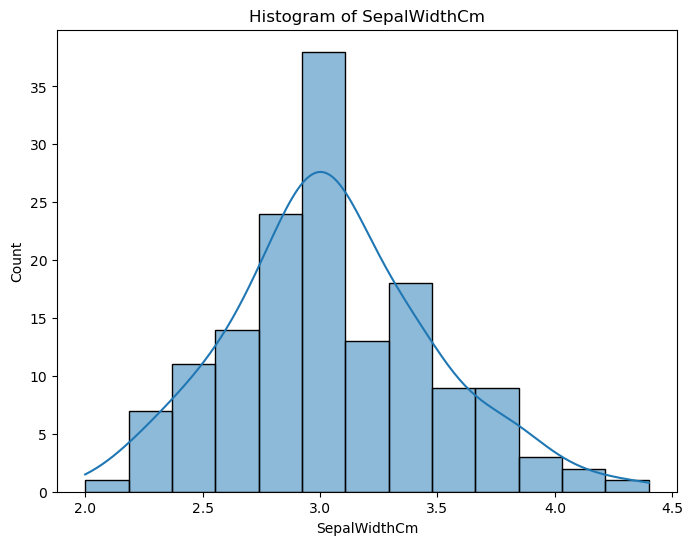

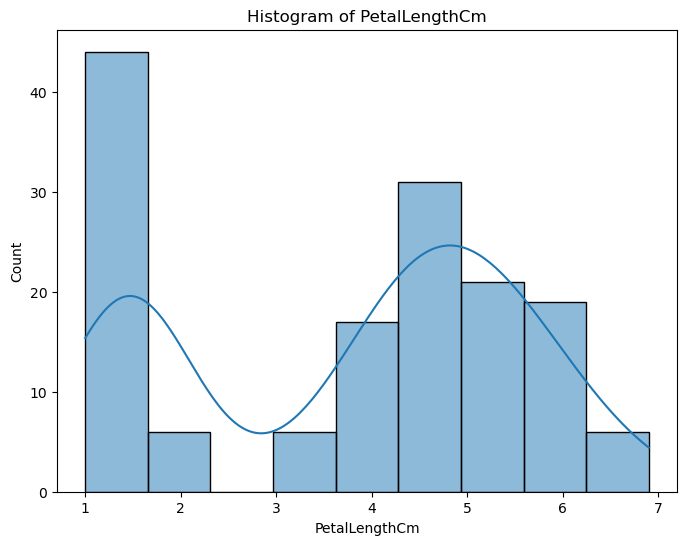

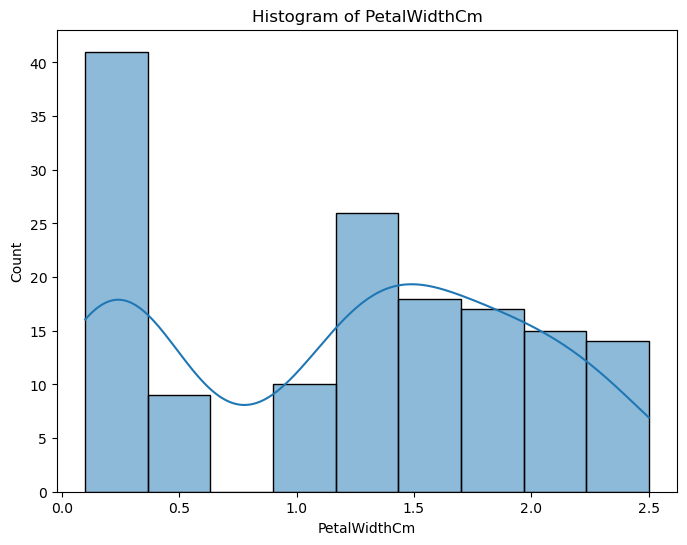

In [52]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.show()

##### Grafique un boxplot de cada variable distinguiendo por especie 

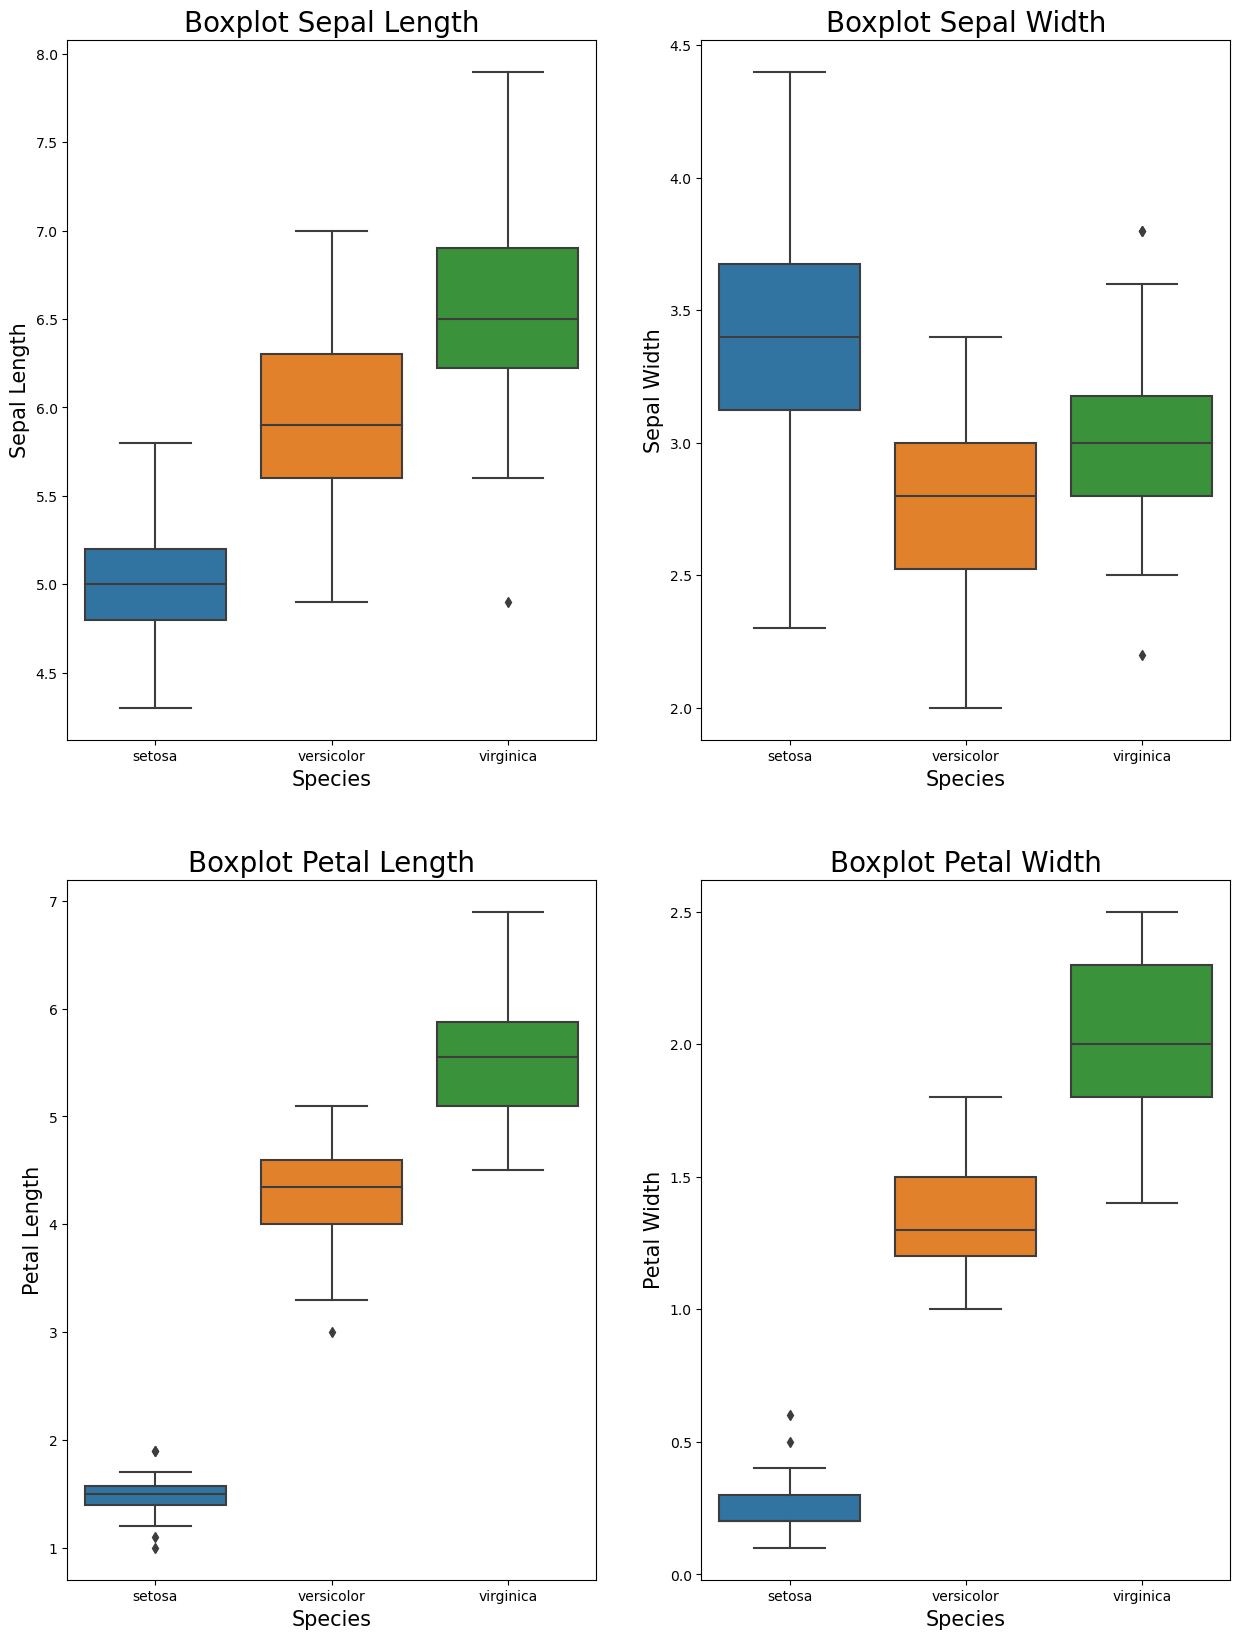

In [53]:
plt.figure(figsize=(15, 20))

def create_boxplot(feature):
    sns.boxplot(data = data, x = 'Species', y = feature)
    if(feature == 'SepalLengthCm'):
        feature = 'Sepal Length'
    if(feature == 'SepalWidthCm'):
        feature = 'Sepal Width'
    if(feature == 'PetalLengthCm'):
        feature = 'Petal Length'
    if(feature == 'PetalWidthCm'):
        feature = 'Petal Width'
    plt.title('Boxplot ' + feature, fontsize = 20)
    plt.xlabel('Species', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)
      
plt.subplot(221)
create_boxplot('SepalLengthCm')
  
plt.subplot(222)
create_boxplot('SepalWidthCm')
  
plt.subplot(223)
create_boxplot('PetalLengthCm')
  
plt.subplot(224)
create_boxplot('PetalWidthCm')
  
plt.show()